# covid-19 infection analysis

The Colab is the segmentation of Covid-19 situation in each countries around the world. The cluster was segmented usng K-mean building function of Scikit Learn.

# Libraries and Data implementation

In [1]:
import requests 
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
from math import pi
from sklearn.cluster import KMeans 

In [2]:
url = "https://corona.lmao.ninja/v3/covid-19/countries"

response = requests.get(url)
#response.json()
df = pd.DataFrame.from_dict(response.json())
df.head()

,updated,country,countryInfo,cases,todayCases,deaths,todayDeaths,recovered,todayRecovered,active,critical,casesPerOneMillion,deathsPerOneMillion,tests,testsPerOneMillion,population,continent,oneCasePerPeople,oneDeathPerPeople,oneTestPerPeople,activePerOneMillion,recoveredPerOneMillion,criticalPerOneMillion
0,1628052688458,Afghanistan,"{'_id': 4, 'iso2': 'AF', 'iso3': 'AFG', 'lat':...",148933,0,6836,0,100896,0,41201,1124,3735,171.0,715311,17937,39878689,Asia,268,5834,56,1033.16,2530.07,28.19
1,1628052688464,Albania,"{'_id': 8, 'iso2': 'AL', 'iso3': 'ALB', 'lat':...",133211,0,2457,0,130291,0,463,3,46344,855.0,916777,318948,2874374,Europe,22,1170,3,161.08,45328.48,1.04
2,1628052688449,Algeria,"{'_id': 12, 'iso2': 'DZ', 'iso3': 'DZA', 'lat'...",175229,0,4370,0,117557,0,53302,29,3919,98.0,230861,5163,44710284,Africa,255,10231,194,1192.16,2629.31,0.65
3,1628052688545,Andorra,"{'_id': 20, 'iso2': 'AD', 'iso3': 'AND', 'lat'...",14766,0,128,0,14348,0,290,0,190775,1654.0,193595,2501227,77400,Europe,5,605,0,3746.77,185374.68,0.00
4,1628052688502,Angola,"{'_id': 24, 'iso2': 'AO', 'iso3': 'AGO', 'lat'...",43070,0,1022,0,39389,0,2659,8,1268,30.0,681443,20059,33972241,Africa,789,33241,50,78.27,1159.45,0.24


In [3]:
feat1 = 'casesPerOneMillion'
feat2 = 'deathsPerOneMillion'
feat3 = 'testsPerOneMillion'
feat4 = 'activePerOneMillion'
feat5 = 'recoveredPerOneMillion'
feat6 = 'criticalPerOneMillion'

In [4]:
feat_cols = [feat1,feat2,feat3,feat4,feat5,feat6]
df_ = df[feat_cols]
df_.head()

,casesPerOneMillion,deathsPerOneMillion,testsPerOneMillion,activePerOneMillion,recoveredPerOneMillion,criticalPerOneMillion
0,3735,171.0,17937,1033.16,2530.07,28.19
1,46344,855.0,318948,161.08,45328.48,1.04
2,3919,98.0,5163,1192.16,2629.31,0.65
3,190775,1654.0,2501227,3746.77,185374.68,0.00
4,1268,30.0,20059,78.27,1159.45,0.24


In [5]:
df_.max()

casesPerOneMillion          190775.00
deathsPerOneMillion           5874.00
testsPerOneMillion        13195517.00
activePerOneMillion          73864.78
recoveredPerOneMillion      185374.68
criticalPerOneMillion          886.70
dtype: float64

In [6]:
df_.min()

casesPerOneMillion          0.00
deathsPerOneMillion         0.00
testsPerOneMillion          0.00
activePerOneMillion      -294.68
recoveredPerOneMillion      0.00
criticalPerOneMillion       0.00
dtype: float64

In [7]:
df_.isna().sum()

casesPerOneMillion        0
deathsPerOneMillion       0
testsPerOneMillion        0
activePerOneMillion       0
recoveredPerOneMillion    0
criticalPerOneMillion     0
dtype: int64

Text(0.5, 1.0, 'recoveredPerOneMillion')

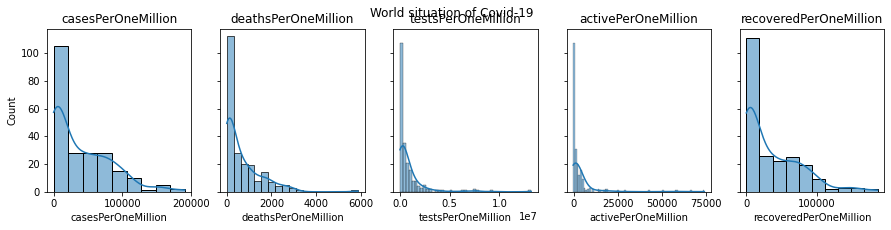

In [8]:
fig, axes = plt.subplots(1, 5, figsize=(15, 3), sharey=True)
fig.suptitle('World situation of Covid-19')

sns.histplot(ax=axes[0], data=df_, x=feat1, kde=True)
axes[0].set_title(feat1)

sns.histplot(ax=axes[1],data=df_, x=feat2, kde=True)
axes[1].set_title(feat2)

sns.histplot(ax=axes[2],data=df_, x=feat3, kde=True)
axes[2].set_title(feat3)

sns.histplot(ax=axes[3],data=df_, x=feat4, kde=True)
axes[3].set_title(feat4)

sns.histplot(ax=axes[4],data=df_, x=feat5, kde=True)
axes[4].set_title(feat5)

## Normalization of data set

In [9]:
df_norm = df_.copy()
#df_norm = (df_norm-df_norm.mean())/df_norm.std() #Sence
df_norm = (df_norm - df_norm.min())/ (df_norm.max()- df_norm.min())

df_norm.head()

,casesPerOneMillion,deathsPerOneMillion,testsPerOneMillion,activePerOneMillion,recoveredPerOneMillion,criticalPerOneMillion
0,0.019578,0.029111,0.001359,0.017905,0.013648,0.031792
1,0.242925,0.145557,0.024171,0.006146,0.244524,0.001173
2,0.020543,0.016684,0.000391,0.020049,0.014184,0.000733
3,1.000000,0.281580,0.189551,0.054497,1.000000,0.000000
4,0.006647,0.005107,0.001520,0.005029,0.006255,0.000271


# Elbow method

To identify the number of cluster

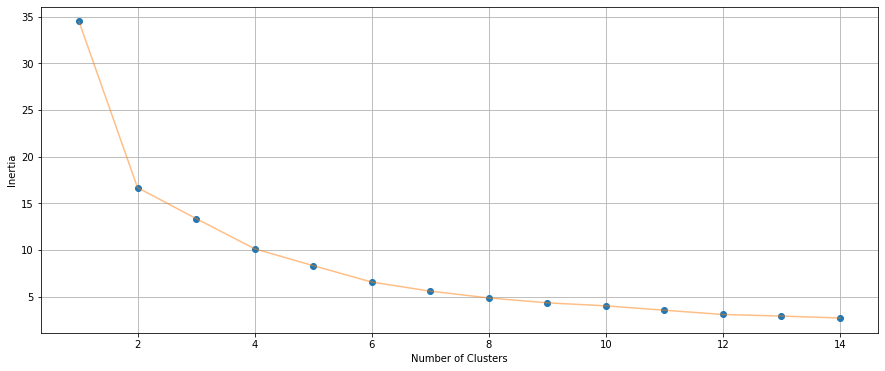

In [10]:

min_range = 1
max_range = 15

inertia = []
k_list = range(min_range, max_range)

for k in k_list:
    km = KMeans(n_clusters = k, random_state= 0)
    km.fit(df_norm)
    score = km.inertia_
    inertia.append(score)

# Plot
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(min_range , max_range) , inertia , 'o')
plt.plot(np.arange(min_range , max_range) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [11]:
def calculate_wcss(data):
    wcss = []
    for n in range(min_range, max_range):
        kmeans = KMeans(n_clusters=n,random_state=0)
        kmeans.fit(df_norm)
        wcss.append(kmeans.inertia_)
    
    return wcss

from math import sqrt

def optimal_number_of_clusters(wcss):
    x1, y1 = min_range, wcss[0]
    x2, y2 = max_range, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2
    

# calculating the within clusters sum-of-squares for n cluster amounts
sum_of_squares = calculate_wcss(df_norm)
    
# calculating the optimal number of clusters
n = optimal_number_of_clusters(sum_of_squares)
print('Optimal Number fo cluster =', n)

Optimal Number fo cluster = 5


# K-mean clustering

In [12]:
clt = n

km = KMeans(n_clusters=clt, random_state =0)
km.fit(df_norm)
cluster = km.predict(df_norm)
cluster_df = df_.copy()
cluster_df['cluster'] = cluster

pd.set_option('display.float_format', '{:20,.2f}'.format)
avg_cluster_df = cluster_df.groupby(by='cluster').mean()
avg_cluster_df.reset_index(inplace=True)
avg_cluster_df

,cluster,casesPerOneMillion,deathsPerOneMillion,testsPerOneMillion,activePerOneMillion,recoveredPerOneMillion,criticalPerOneMillion
0,0,"5,703.28",91.18,"258,553.23",676.49,"4,935.53",4.27
1,1,"86,626.28","1,552.13","1,337,593.09","4,503.06","80,571.09",46.57
2,2,"44,482.22",736.69,"1,279,040.90","4,238.31","39,507.17",22.52
3,3,"75,409.33","1,352.33","1,212,210.67","58,114.44","15,942.79",35.59
4,4,"153,101.50","1,807.50","2,915,318.30","2,815.39","148,478.84",43.47


In [13]:
from math import pi

def plot_radar_df(df, feat_cols, label_col, selected_label_list, split_chart=False, dpi=100, n_cols = 3, fig_h=8, fig_w=8):
    
    # min-max normalization
    for col in feat_cols:
        df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())
    
    # select data:
    row_idx = df[label_col].isin(selected_label_list)
    data = df[row_idx]
    data = data[feat_cols].values

    # number of variable
    N = len(feat_cols)

    # angle of each axis in the plot
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # set color
    my_color = plt.cm.get_cmap("Set2", len(df.index))

    # set font size and subplot
    if not split_chart:
        ax = plt.subplot(111, polar=True )
        size = 10
    else:
        size = 5
        dpi = 1.5*dpi

    for i in range(len(data)):

        title = label_col +'_' +str(selected_label_list[i])

        # Initialise the spider plot
        if split_chart:
            n_rows = np.ceil(len(df)/n_cols)
            ax = plt.subplot(n_rows,n_cols,i+1, polar=True )

        # If you want the first axis to be on top:
        ax.set_theta_offset(pi / 2)
        ax.set_theta_direction(-1)

        # Draw one axe per variable + add labels labels yet
        plt.xticks(angles[:-1], feat_cols, color='grey', size=int(size*0.8))

        # Draw ylabels
        ax.set_rlabel_position(0)
        plt.yticks([0.20, 0.4, 0.6, 0.8,  1], \
                   ["20%","40%","60%","80%","100%"], color="grey", size=size)
        plt.ylim(0,1)

        # Plot
        values = list(data[i,:])
        values += values[:1]
        ax.plot(angles, values, color=my_color(i), linewidth=2, linestyle='solid', label=title)
        ax.fill(angles, values, color=my_color(i), alpha=0.4)

        # Add a title or legend
        if split_chart:
            plt.title(title, size=11, color=my_color(i), y=1.2)
        else:
            plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1))

        # Adjust DPI
        fig = plt.gcf()
        fig.set_dpi(dpi)
        fig.set_figheight(fig_h)
        fig.set_figwidth(fig_w)

    plt.tight_layout()
    plt.show()

# Visualization

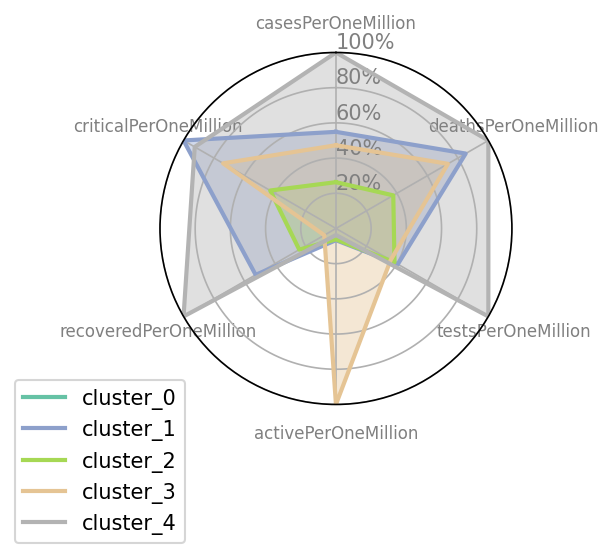

In [14]:
label_col = 'cluster'
selected_label_list = [i for i in range(clt)]

plot_radar_df(avg_cluster_df, feat_cols, label_col, selected_label_list, split_chart=False, dpi=150, n_cols=3, fig_h=4, fig_w=4)

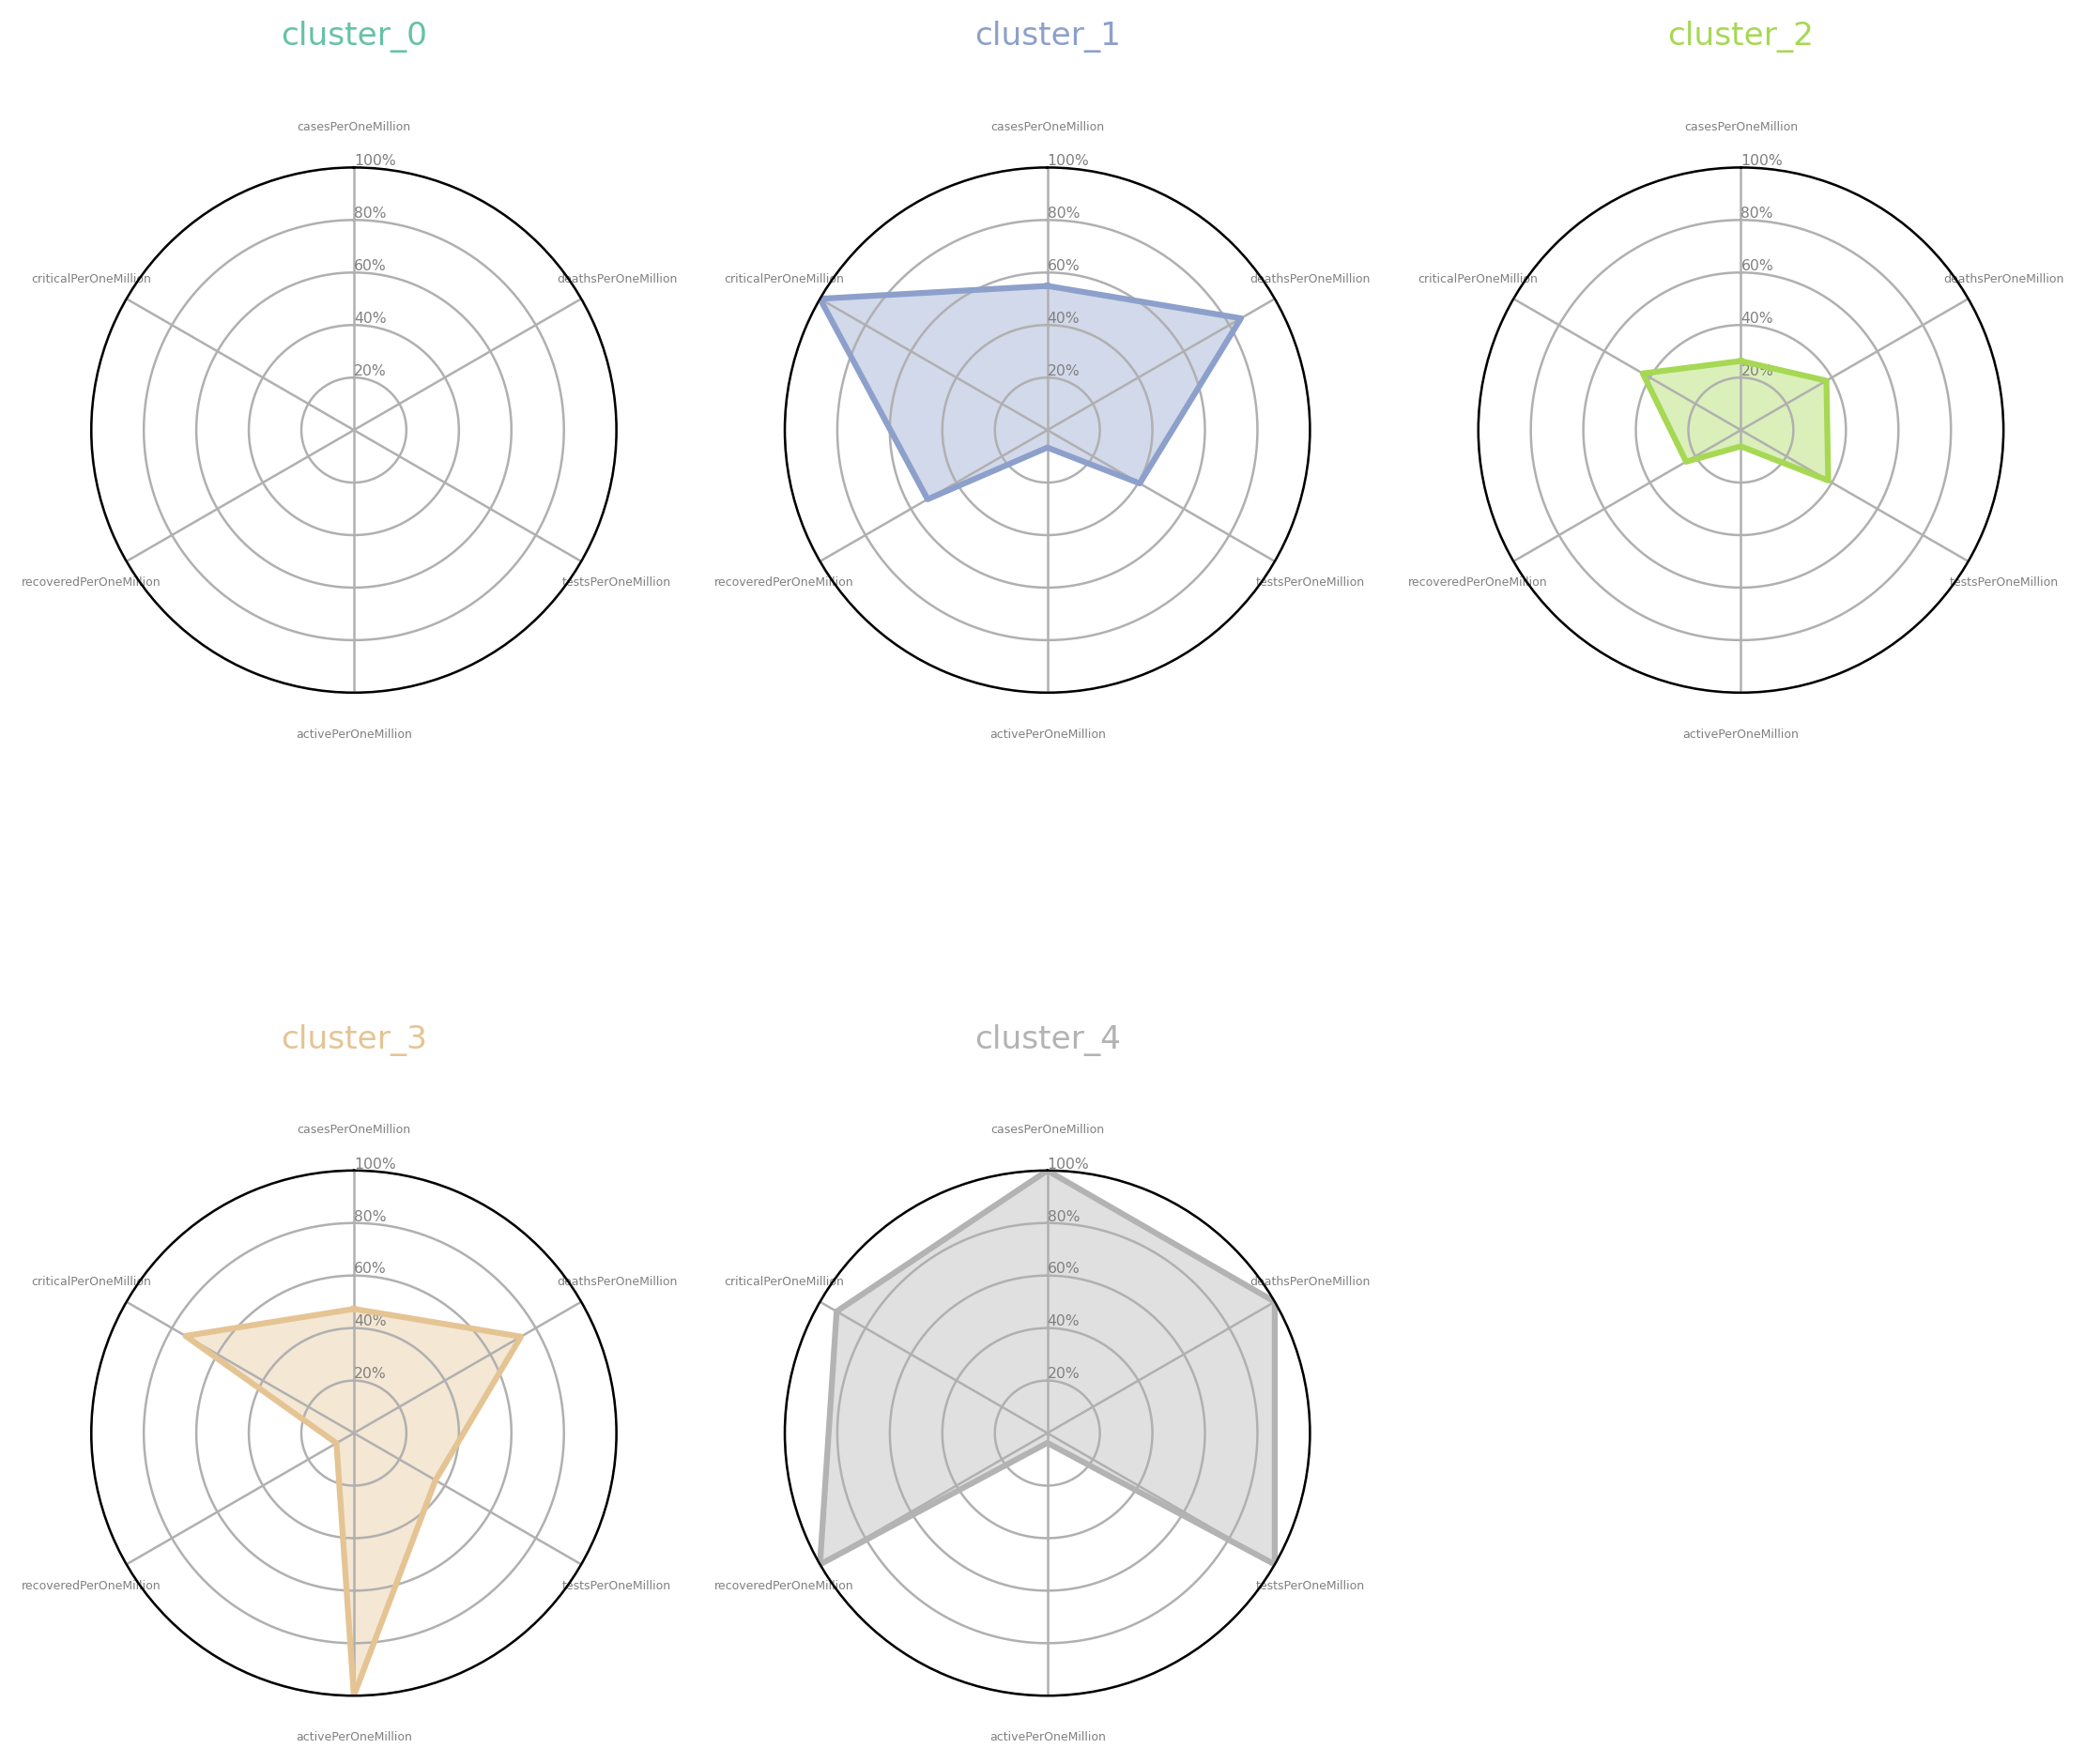

In [15]:
plot_radar_df(avg_cluster_df, feat_cols, label_col, selected_label_list, split_chart=True, dpi=150, n_cols=3, fig_h=10, fig_w=10)

# Application

In [ ]:
zcluster_full_df = df.copy()
cluster_full_df['cluster'] = cluster

In [ ]:
# To find Thailand in the dataset
cluster_thai  = cluster_full_df.loc[cluster_full_df['country'] == "Thailand"]
cluster_thai = cluster_thai['cluster']
cluster_thai

200    0
Name: cluster, dtype: int32

In [ ]:
# Display the number of countries in each cluster
for i in range(clt):
  n = len(cluster_full_df.loc[cluster_full_df.cluster==i])
  print("Number of countries in cluster " +str(i) + " is "  +str(n))

Number of countries in cluster 0 is 109
Number of countries in cluster 1 is 45
Number of countries in cluster 2 is 10
Number of countries in cluster 3 is 6
Number of countries in cluster 4 is 52


In [ ]:
# List of countries in the same cluster of Thailand
cluster_full_df.loc[cluster_full_df.cluster==0].country.tolist()

['Afghanistan',
 'Algeria',
 'Angola',
 'Anguilla',
 'Antigua and Barbuda',
 'Australia',
 'Bangladesh',
 'Barbados',
 'Benin',
 'Bhutan',
 'Brunei',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'China',
 'Comoros',
 'Congo',
 "Côte d'Ivoire",
 'DRC',
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Ethiopia',
 'Falkland Islands (Malvinas)',
 'Finland',
 'Gabon',
 'Gambia',
 'Ghana',
 'Greenland',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Haiti',
 'Hong Kong',
 'India',
 'Indonesia',
 'Jamaica',
 'Japan',
 'Kenya',
 'Kyrgyzstan',
 "Lao People's Democratic Republic",
 'Lesotho',
 'Liberia',
 'MS Zaandam',
 'Macao',
 'Madagascar',
 'Malawi',
 'Mali',
 'Marshall Islands',
 'Mauritania',
 'Mauritius',
 'Micronesia',
 'Montserrat',
 'Morocco',
 'Mozambique',
 'Myanmar',
 'Nepal',
 'New Caledonia',
 'New Zealand',
 'Nicaragua',
 'Niger',
 'Nigeria',
 

In [ ]:
# display Thailand data
df.loc[200]

updated                                                       1627894863045
country                                                            Thailand
countryInfo               {'_id': 764, 'iso2': 'TH', 'iso3': 'THA', 'lat...
cases                                                                633284
todayCases                                                            17970
deaths                                                                 5168
todayDeaths                                                             178
recovered                                                            419241
todayRecovered                                                        13919
active                                                               208875
critical                                                               4765
casesPerOneMillion                                                     9048
deathsPerOneMillion                                                   74.00
tests       